<a href="https://colab.research.google.com/github/pedroblossbraga/supportvectormachines_tcc/blob/master/TCC_imbalanced_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMs em dados desbalancedados (Imbalanced Learning with SVMs)



- ref: https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import time

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Criando um dataset

In [2]:
# gerando 10000 dados fictícios com desbalanceamento
X, y = make_classification(n_samples=10000, 
                           n_features=2, 
                           n_redundant=0,
	n_clusters_per_class=1,
   weights=[0.99], 
   flip_y=0, 
   random_state=42)

Counter({0: 9900, 1: 100})


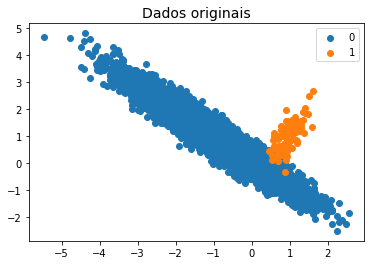

In [21]:
# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.title('Dados originais', fontsize = 14)
plt.legend()
plt.show()

In [7]:
# instanciando o modelo
model = SVC()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.997


In [4]:
# instanciando o modelo
model = SVC(gamma='scale')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.997


# Usando os pesos de classes do scikit-learn

In [5]:
# # define model
# weights = {0:1.0, 1:1.0}
# model = SVC(gamma='scale', class_weight=weights)

# define model
model = SVC(gamma='scale', class_weight='balanced')

In [6]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 1.000


# Undersampling

In [22]:
rus = RandomUnderSampler(random_state=42)
# rus.fit(X, y)
# X_resampled, y_resampled = rus.sample(X, y)

X_undersampled, y_undersampled = rus.fit_resample(X, y)

Counter({0: 100, 1: 100})


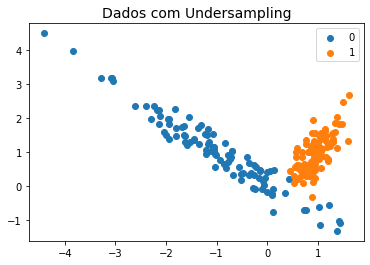

In [23]:
# summarize class distribution
counter = Counter(y_undersampled)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y_undersampled == label)[0]
	plt.scatter(X_undersampled[row_ix, 0], 
             X_undersampled[row_ix, 1], 
             label=str(label))
plt.title('Dados com Undersampling', fontsize = 14)
plt.legend()
plt.show()

In [24]:
# instanciando o modelo
model = SVC()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X_undersampled, y_undersampled,
                         scoring='roc_auc', 
                         cv=cv, 
                         n_jobs=-1)

# summarize performance
print('(Undersampling) Mean ROC AUC: %.3f' % np.mean(scores))

(Undersampling) Mean ROC AUC: 1.000


# Oversampling

In [25]:
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

Counter({0: 9900, 1: 9900})


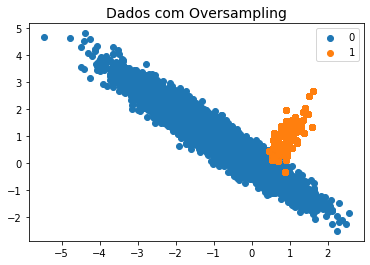

In [26]:
# summarize class distribution
counter = Counter(y_oversampled)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y_oversampled == label)[0]
	plt.scatter(X_oversampled[row_ix, 0], 
             X_oversampled[row_ix, 1], 
             label=str(label))
plt.title('Dados com Oversampling', fontsize = 14)
plt.legend()
plt.show()

In [53]:
# instanciando o modelo
model = SVC()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X_oversampled, y_oversampled,
                         scoring='roc_auc', 
                         cv=cv, 
                         n_jobs=-1)

# summarize performance
print('(Oversampling) Mean ROC AUC: %.3f' % np.mean(scores))

(Oversampling) Mean ROC AUC: 1.000


# Plotando as amostragens em conjunto

In [54]:
def plot_sampling(X,y, titulo):
  # summarize class distribution
  counter = Counter(y)
  print(counter)

  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.title(titulo, fontsize = 14)
  # plt.legend()
  plt.text(-5.5, -2, 
           counter,
           fontsize = 14)
  plt.ylim([-3, 5])
  plt.xlim([-6, 3])
  return plt

def cross_validate_model(X,y):
  t0 = time.time()

  # instanciando o modelo
  model = SVC()

  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

  # evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

  # summarize performance
  print('Mean ROC AUC: %.3f' % np.mean(scores))
  dt = time.time() - t0
  return np.mean(scores), dt


def cross_val_classweights(X,y):
  t0 = time.time()

  # instanciando o modelo
  model = SVC(gamma='scale', class_weight='balanced')

  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

  # evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

  # summarize performance
  print('Mean ROC AUC: %.3f' % np.mean(scores))
  dt = time.time() - t0
  return np.mean(scores), dt

Mean ROC AUC: 0.997
Counter({0: 9900, 1: 100})
Mean ROC AUC: 1.000
Counter({0: 100, 1: 100})
Mean ROC AUC: 1.000
Counter({0: 9900, 1: 9900})
Mean ROC AUC: 1.000
Counter({0: 9900, 1: 100})


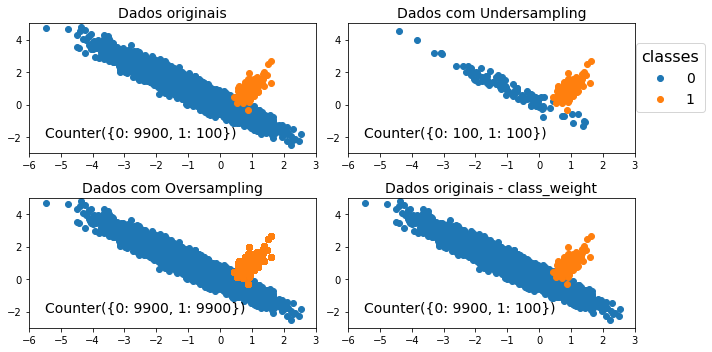

,amostragem,ROC_AUC_medio,tempo_execução
0,Dados originais,0.997448,1.036653
1,Undersampling,1.000000,0.100182
2,Oversampling,0.999759,10.746799
3,class_weights,0.999731,3.700017


In [55]:
d = {'amostragem': [],
     'ROC_AUC_medio': [],
     'tempo_execução': []}


plt.figure(figsize=(10,5))
plt.subplot(2,2,1)

roc_auc, dt = cross_validate_model(X,y)
d['amostragem'].append('Dados originais')
d['ROC_AUC_medio'].append(roc_auc)
d['tempo_execução'].append(dt)

plot_sampling(X,y, 
              titulo = 'Dados originais')

plt.subplot(2,2,2)

roc_auc, dt = cross_validate_model(X_undersampled, y_undersampled)
d['amostragem'].append('Undersampling')
d['ROC_AUC_medio'].append(roc_auc)
d['tempo_execução'].append(dt)

plot_sampling(X_undersampled, y_undersampled,
              titulo = 'Dados com Undersampling')

plt.legend(
           bbox_to_anchor = (0.98, 0.9),
           title='classes',
           title_fontsize=16,
           fontsize=14
           )

plt.subplot(2,2,3)

roc_auc, dt = cross_validate_model(X_oversampled, y_oversampled)
d['amostragem'].append('Oversampling')
d['ROC_AUC_medio'].append(roc_auc)
d['tempo_execução'].append(dt)

plot_sampling(X_oversampled, y_oversampled,
              titulo = 'Dados com Oversampling')

plt.subplot(2,2,4)
roc_auc, dt = cross_val_classweights(X,y)
d['amostragem'].append('class_weights')
d['ROC_AUC_medio'].append(roc_auc)
d['tempo_execução'].append(dt)

plot_sampling(X, y,
              titulo = 'Dados originais - class_weight')

plt.tight_layout()
plt.show()

pd.DataFrame(d)